# Linear regression :

### Importing data

[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 427896.62
R^2 Score: 0.41


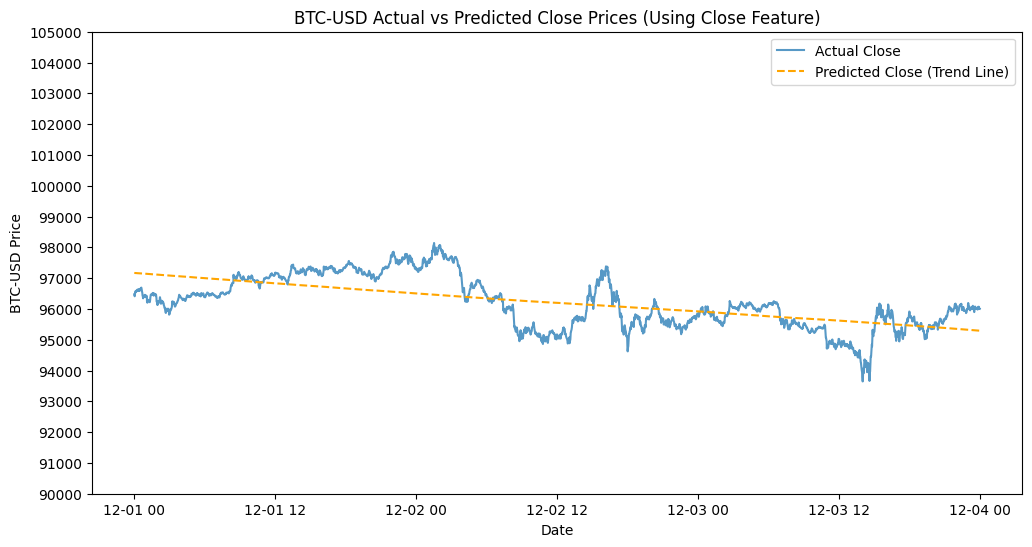

In [175]:
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Download BTC-USD data
btc_yf_df = yf.download(
    'BTC-USD',      # The currency we are interested in
    start='2024-12-01',  # The starting date
    end='2024-12-04',    # The ending date
    interval='1m'        # The frequency of collecting the data (1 day)
)

# Save data to a CSV file
btc_yf_df.to_csv('btc_yf_data.csv')

# Preprocess Data
btc_yf_df.dropna(inplace=True)  # Remove rows with missing values
btc_yf_df.reset_index(inplace=True)  # Reset index to access 'Datetime'

# Prepare data for regression
X = np.arange(len(btc_yf_df)).reshape(-1, 1)  # Use indices as the predictor (time)
y = btc_yf_df['Close'].values  # Target variable: Close prices

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predictions
btc_yf_df['Predicted_Close'] = model.predict(X)

# Evaluate Model
mse = mean_squared_error(y, btc_yf_df['Predicted_Close'])
r2 = r2_score(y, btc_yf_df['Predicted_Close'])
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(btc_yf_df['Datetime'], btc_yf_df['Close'], label='Actual Close', alpha=0.75)
plt.plot(btc_yf_df['Datetime'], btc_yf_df['Predicted_Close'], label='Predicted Close (Trend Line)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('BTC-USD Price')
plt.title('BTC-USD Actual vs Predicted Close Prices (Using Close Feature)')
plt.legend()
plt.yticks(np.arange(90000, 105001, 1000))
plt.show()


In [176]:
# Predict the next minute (after the last time point)
next_minute = model.predict([[len(btc_yf_df)]])

print(f"Predicted BTC-USD Price for the next minute: {next_minute[0][0]:.2f}")



Predicted BTC-USD Price for the next minute: 95292.59


[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 61942.05
R^2 Score: 0.54


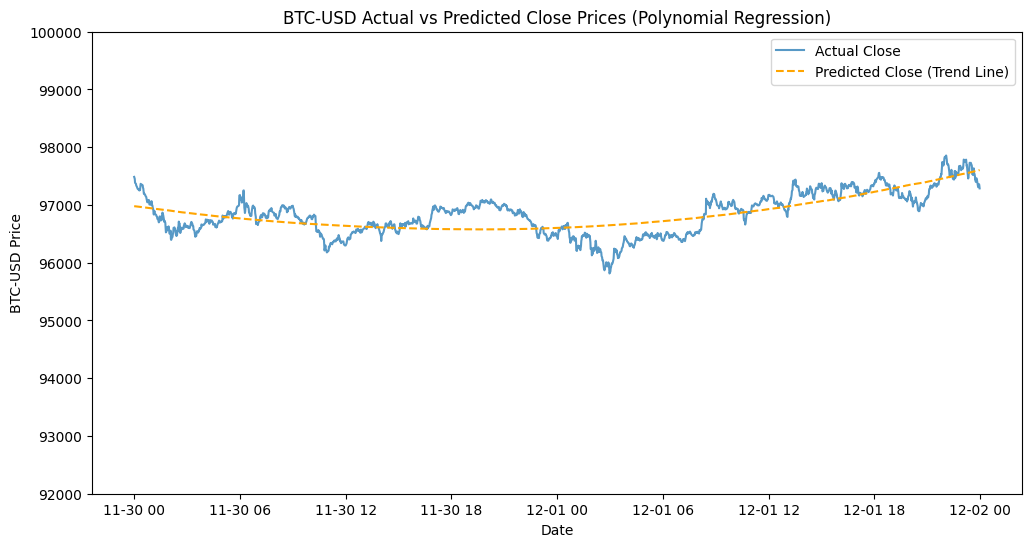

In [177]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Download BTC-USD data
btc_yf_df = yf.download(
    'BTC-USD',      # The currency we are interested in
    start='2024-11-30',  # The starting date
    end='2024-12-02',    # The ending date
    interval='1m'        # The frequency of collecting the data (1 minute)
)

# Save data to a CSV file
btc_yf_df.to_csv('btc_yf_data.csv')


# Preprocess Data
btc_yf_df.dropna(inplace=True)  # Remove rows with missing values
btc_yf_df.reset_index(inplace=True)  # Reset index to access 'Datetime'

# Prepare data for regression
X = np.arange(len(btc_yf_df)).reshape(-1, 1)  # Use indices as the predictor (time)
y = btc_yf_df['Close'].values  # Target variable: Close prices

# Create PolynomialFeatures object with degree 2 (quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transform X to include polynomial features

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
btc_yf_df['Predicted_Close'] = model.predict(X_poly)

# Evaluate Model
mse = mean_squared_error(y, btc_yf_df['Predicted_Close'])
r2 = r2_score(y, btc_yf_df['Predicted_Close'])
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(btc_yf_df['Datetime'], btc_yf_df['Close'], label='Actual Close', alpha=0.75)
plt.plot(btc_yf_df['Datetime'], btc_yf_df['Predicted_Close'], label='Predicted Close (Trend Line)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('BTC-USD Price')
plt.title('BTC-USD Actual vs Predicted Close Prices (Polynomial Regression)')
plt.legend()
plt.yticks(np.arange(92000, 100001, 1000))
plt.show()
